#  Use Case: Teacher Workforce Planning

**Authored by:** Saneli Wijesinghe  
**Duration:** 90 mins  
**Level:** Intermediate  
**Pre-requisite Skills:** Python, pandas, data cleaning, exploratory data analysis (EDA)

---

##  Scenario

_As a data analyst working with the Victorian Government education department, I need to evaluate if current teacher workforce distribution aligns with the population of children aged 0–12 years across different regions. This insight will help support future hiring and school planning decisions._

---

##  What this use case will teach you

This use case teaches you how to:
- Load and clean datasets from CSV and Excel formats
- Explore and understand demographic and workforce data
- Compare regional data between children and teachers
- Identify mismatches to assist in planning

---

##  At the end of this use case, you will:

- Be able to read real-world government datasets using Python  
- Identify missing or misaligned data across two different sources  
- Derive insights useful for decision-making using data  
- Learn to interpret CSV and Excel data structures

---

##  Background

This project combines two publicly available datasets:

- **Families with Children Profile (2016)**: Offers demographic insights into children aged 0–12 in Victoria  
- **Teacher Workforce Snapshot (2023)**: A supplementary report on the distribution of teachers across regions  

The objective is to understand whether the teacher workforce is proportionate to the child population, helping improve staffing models and planning in Victoria’s schools.


In [7]:
import pandas as pd
import requests

# ---------------------------
# 1. Load Families Dataset from JSON API (Export endpoint)
# ---------------------------
families_url = (
    "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/"
    "families-with-children-profile-2016-aged-0-12-years/exports/json"
)

families_response = requests.get(families_url)
if families_response.status_code == 200:
    families_json = families_response.json()
    families_df = pd.json_normalize(families_json)
    print(" Families dataset loaded via export endpoint")
    display(families_df.head())
else:
    print(" Failed to load families dataset:", families_response.status_code)


# ---------------------------
# 2. Load Teachers Dataset from Excel (Skip header metadata)
# ---------------------------
# URL to the Excel file
teachers_url = (
    "https://www.education.vic.gov.au/Documents/"
    "school/teachers/profdev/careers/"
    "Teacher-Workforce-Snapshot-2023_Supplementary-data.xlsx"
)

# Load only the "2.1 Supply and demand" sheet and skip metadata
teachers_df = pd.read_excel(
    teachers_url,
    sheet_name='2.1 Supply and demand',
    skiprows=6,
    engine='openpyxl'
)

# Drop completely empty rows
teachers_df = teachers_df.dropna(how='all')

print(" Teacher supply/demand dataset loaded and cleaned")
display(teachers_df.head())



 Families dataset loaded via export endpoint


,profile,census_year,category,sub_category,sub_order,value
0,Families with children 0-5 years,2016,Country of birth - detailed,Hong Kong (SAR of China),14,102
1,Families with children 0-5 years,2016,Year of arrival,Arrived prior to 1996,1,537
2,Families with children 0-5 years,2016,Language spoken at home - detailed,Hindi,4,548
3,Families with children 0-5 years,2016,Need for assistance with core activities,Has need for assistance with core activities,1,110
4,Families with children 6-8 years,2016,Occupation,Sales Workers,6,38


 Teacher supply/demand dataset loaded and cleaned


,Table 2.1.1: Forecast supply of early childhood teachers,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Year,Registered,Recruitable Supply,Supply,NaN,NaN
1,2023,10821.92,8522.126856,7627.762856,NaN,NaN
2,2024,13164.92,10367.210097,9279.211801,NaN,NaN
3,2025,13615.59491,10722.11096,9596.867202,NaN,NaN
4,2026,13898.636869,10945.002969,9796.367563,NaN,NaN


In [8]:
# EDA: Families Dataset

# Shape and preview
print("Shape of Families dataset:", families_df.shape)
display(families_df.head())

# Check column data types
print("\nData Types:")
print(families_df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(families_df.isnull().sum())

# Unique profiles and categories
print("\nUnique Profiles:", families_df['profile'].unique())
print("\nUnique Categories:", families_df['category'].unique())


Shape of Families dataset: (671, 6)


,profile,census_year,category,sub_category,sub_order,value
0,Families with children 0-5 years,2016,Country of birth - detailed,Hong Kong (SAR of China),14,102
1,Families with children 0-5 years,2016,Year of arrival,Arrived prior to 1996,1,537
2,Families with children 0-5 years,2016,Language spoken at home - detailed,Hindi,4,548
3,Families with children 0-5 years,2016,Need for assistance with core activities,Has need for assistance with core activities,1,110
4,Families with children 6-8 years,2016,Occupation,Sales Workers,6,38



Data Types:
profile         object
census_year     object
category        object
sub_category    object
sub_order        int64
value            int64
dtype: object

Missing Values:
profile         0
census_year     0
category        0
sub_category    0
sub_order       0
value           0
dtype: int64

Unique Profiles: ['Families with children 0-5 years' 'Families with children 6-8 years'
 'Families with children 9-12 years'
 'Other family with child under 15 years'
 'Families with no children 0-14 years' 'Total all families'
 'Families with children 0-12 years' 'Families with children 13-14 years']

Unique Categories: ['Country of birth - detailed' 'Year of arrival'
 'Language spoken at home - detailed'
 'Need for assistance with core activities' 'Occupation'
 'Personal weekly income - detailed' 'Personal weekly income - overview'
 'Country of birth - overview' 'Language spoken at home - overview'
 'Proficiency in English' 'Housing type' 'Housing tenure'
 'Dependent students in family

In [9]:
# EDA: Teacher Supply Dataset

# Shape and preview
print("Shape of Teacher Supply dataset:", teachers_df.shape)
display(teachers_df.head())

# Check column data types
print("\nData Types:")
print(teachers_df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(teachers_df.isnull().sum())




Shape of Teacher Supply dataset: (324, 6)


,Table 2.1.1: Forecast supply of early childhood teachers,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Year,Registered,Recruitable Supply,Supply,NaN,NaN
1,2023,10821.92,8522.126856,7627.762856,NaN,NaN
2,2024,13164.92,10367.210097,9279.211801,NaN,NaN
3,2025,13615.59491,10722.11096,9596.867202,NaN,NaN
4,2026,13898.636869,10945.002969,9796.367563,NaN,NaN



Data Types:
Table 2.1.1: Forecast supply of early childhood teachers    object
Unnamed: 1                                                  object
Unnamed: 2                                                  object
Unnamed: 3                                                  object
Unnamed: 4                                                  object
Unnamed: 5                                                  object
dtype: object

Missing Values:
Table 2.1.1: Forecast supply of early childhood teachers      0
Unnamed: 1                                                   69
Unnamed: 2                                                  127
Unnamed: 3                                                  148
Unnamed: 4                                                  172
Unnamed: 5                                                  306
dtype: int64


In [10]:
# Keep only relevant 4 columns (drop the last two)
clean_teachers_df = teachers_df.iloc[:, 0:4]

# Rename columns correctly
clean_teachers_df.columns = ['Year', 'Registered', 'Recruitable Supply', 'Supply']

# Drop rows where 'Year' is not a number (in case of headers/footers)
clean_teachers_df = clean_teachers_df[clean_teachers_df['Year'].astype(str).str.isnumeric()]

# Convert to correct types
clean_teachers_df = clean_teachers_df.astype({
    'Year': int,
    'Registered': float,
    'Recruitable Supply': float,
    'Supply': float
})

# Final preview
display(clean_teachers_df.head())


,Year,Registered,Recruitable Supply,Supply
1,2023,10821.920000,8522.126856,7627.762856
2,2024,13164.920000,10367.210097,9279.211801
3,2025,13615.594910,10722.110960,9596.867202
4,2026,13898.636869,10945.002969,9796.367563
5,2027,14023.805289,11043.571536,9884.591743


In [11]:
# Convert `census_year` to integer if needed
families_df['census_year'] = families_df['census_year'].astype(int)

# Strip whitespaces from strings (if any)
families_df['profile'] = families_df['profile'].str.strip()
families_df['category'] = families_df['category'].str.strip()
families_df['sub_category'] = families_df['sub_category'].str.strip()

# Confirm missing values
print(families_df.isnull().sum())

# Drop rows with missing critical values (optional based on needs)
families_df.dropna(subset=['value'], inplace=True)


profile         0
census_year     0
category        0
sub_category    0
sub_order       0
value           0
dtype: int64


##  Data Preparation and Exploratory Analysis

In the above sections, I prepared and explored two datasets — the **Families Dataset** and the **Teacher Workforce Dataset** — which form the foundation for understanding potential gaps in teacher supply and demand based on population trends.

---

### Dataset Overview

1. **Families Dataset**
   - Sourced via API from the City of Melbourne Open Data Portal.
   - Contains demographic data on families with children, useful for estimating future educational demand.
   - Loaded and cleaned using pandas; missing values handled, and string fields stripped of whitespace.
   - Key columns:
     - `profile`: Age group (e.g., *Families with children 0–5 years*).
     - `census_year`: Year of census (mostly 2016).
     - `category`: Broad demographic variable (e.g., *Country of birth*).
     - `sub_category`: Specific breakdown (e.g., *Malaysia*).
     - `value`: Count of families matching the category/subcategory.

2. **Teacher Workforce Dataset**
   - Extracted from the Department of Education’s Excel report.
   - Cleaned to remove formatting issues, extra header rows, and empty columns.
   - Focused on the *Forecast supply of early childhood teachers* table.
   - Final columns used:
     - `Year`: Forecast year.
     - `Registered`: Total registered early childhood teachers.
     - `Recruitable Supply`: Subset available to enter or re-enter the workforce.
     - `Supply`: Effective forecasted supply.

---

###  Data Cleaning Summary

**Families Dataset**
- Converted `census_year` to integer for easier filtering.
- Removed extra spaces from string columns (`profile`, `category`, `sub_category`).
- Dropped rows with missing `value` entries, which are essential for analysis.
- Confirmed the dataset has no missing values remaining.

**Teacher Workforce Dataset**
- Selected only relevant columns (`Year`, `Registered`, `Recruitable Supply`, `Supply`) and dropped extras.
- Converted all columns to proper numeric types (e.g., `int`, `float`).
- Removed rows with non-numeric or invalid values in the `Year` column.
- Dataset now clean and ready for time series analysis or visualization.

---

###  Initial EDA Highlights

**Families Dataset**
- 671 rows × 6 columns.
- Unique `profile` examples include:
  - *Families with children 0–5 years*
  - *Families with children 6–8 years*
  - *Families with no children 0–14 years*
- Common `category` values:
  - *Country of birth - detailed*, *Providing child care*, *Language spoken at home*, etc.
- All columns are of appropriate types and free of missing values.

**Teacher Workforce Dataset**
- 324 rows initially, trimmed down to valid yearly entries.
- Data ranges from past years to forecasted years (e.g., 2023–2027).
- Smooth trends in teacher registration and supply are evident, useful for identifying shortages or surpluses.

---

This cleaned and validated foundation enables future steps such as visualization, demand modeling, and workforce planning based on population trends.


##  Additional EDA and Cleaning

I performed a final round of exploratory data analysis to ensure both datasets were clean, consistent, and insightful. This included checking for duplicates, inspecting summary statistics, and visualizing value distributions and temporal trends.


In [14]:
# Final cleaning: check duplicates and show stats
print(" Duplicate Rows Check")
print("Families:", families_df.duplicated().sum())
print("Teachers:", clean_teachers_df.duplicated().sum())

# Descriptive stats
print("\n Summary Statistics - Families Dataset")
display(families_df.describe())

print("\n Summary Statistics - Teacher Supply Dataset")
display(clean_teachers_df.describe())


 Duplicate Rows Check
Families: 0
Teachers: 0

 Summary Statistics - Families Dataset


,census_year,sub_order,value
count,671.0,671.000000,671.000000
mean,2016.0,6.466468,1257.716841
std,0.0,5.489882,3284.127687
min,2016.0,1.000000,0.000000
25%,2016.0,2.000000,48.500000
50%,2016.0,5.000000,178.000000
75%,2016.0,9.000000,877.000000
max,2016.0,23.000000,40071.000000



 Summary Statistics - Teacher Supply Dataset


,Year,Registered,Recruitable Supply,Supply
count,223.000000,223.000000,169.000000,151.000000
mean,2020.816143,29627.114238,91258.007536,29052.672922
std,6.655439,41200.005167,131623.635966,32733.763136
min,2007.000000,-40.033461,55.133983,-24.964099
25%,2015.500000,1636.500000,646.645867,1456.023668
50%,2023.000000,8644.000000,21242.000000,9304.000000
75%,2026.000000,70171.145079,221217.100000,54559.640938
max,2029.000000,112495.800000,386307.146708,102080.967121


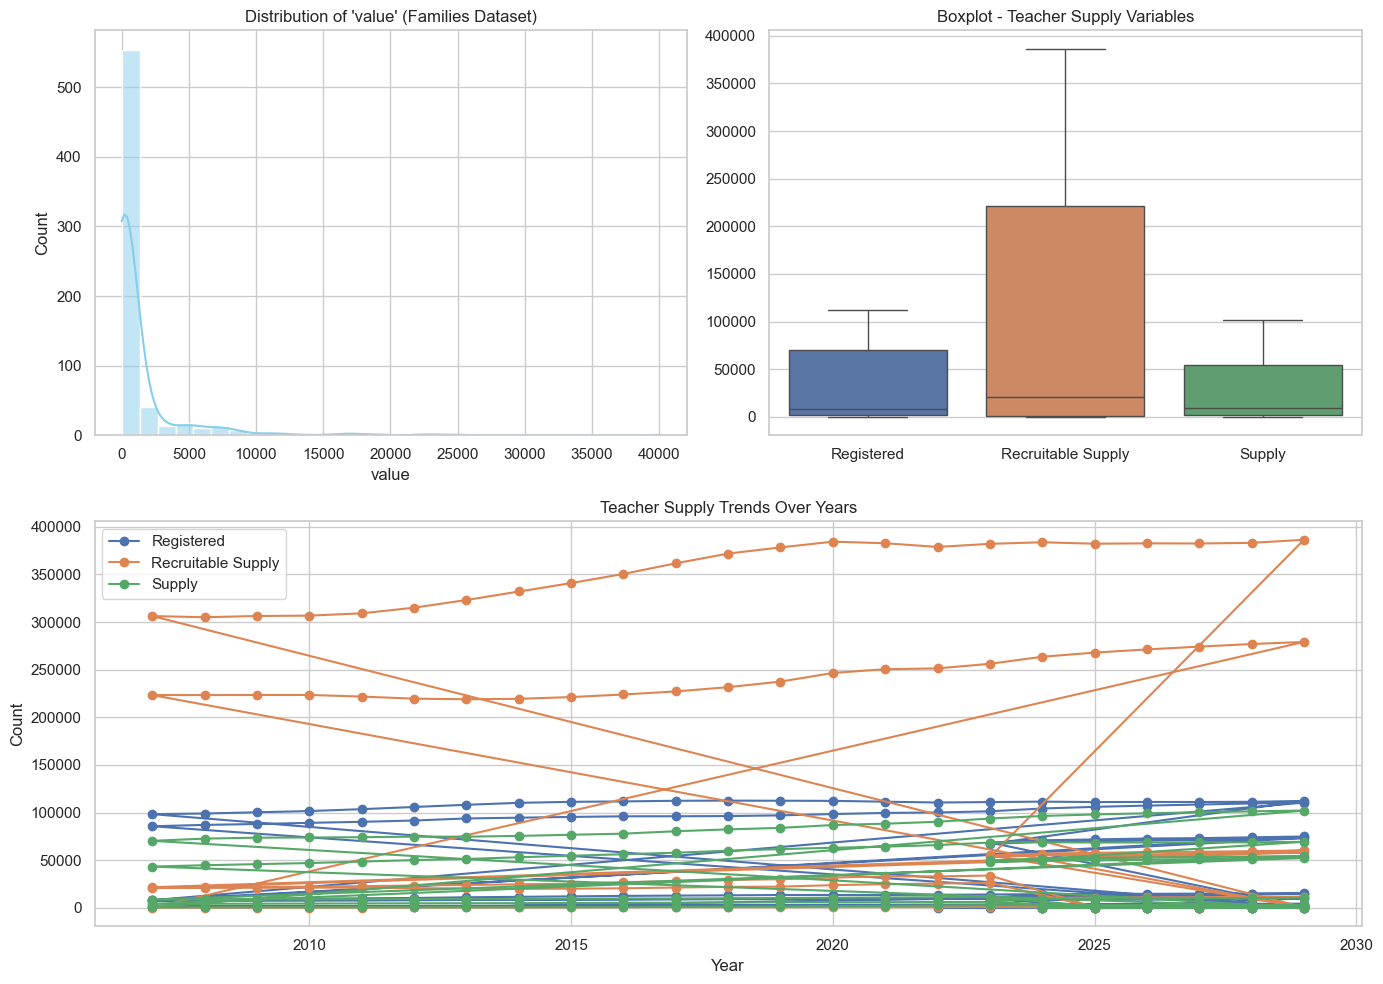

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(14,10))

# Histogram for families 'value'
plt.subplot(2,2,1)
sns.histplot(families_df['value'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of 'value' (Families Dataset)")

# Boxplot for teacher supply metrics
plt.subplot(2,2,2)
sns.boxplot(data=clean_teachers_df[['Registered', 'Recruitable Supply', 'Supply']])
plt.title("Boxplot - Teacher Supply Variables")

# Line trends over years
plt.subplot(2,1,2)
plt.plot(clean_teachers_df['Year'], clean_teachers_df['Registered'], marker='o', label='Registered')
plt.plot(clean_teachers_df['Year'], clean_teachers_df['Recruitable Supply'], marker='o', label='Recruitable Supply')
plt.plot(clean_teachers_df['Year'], clean_teachers_df['Supply'], marker='o', label='Supply')
plt.title("Teacher Supply Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()



### Final EDA Insights & Visual Summary 

After cleaning both datasets and ensuring data consistency, I performed deeper exploratory data analysis to extract key insights:

- **Families Dataset:**
  - The `value` field (population counts) is heavily right-skewed with many low values and a few very high ones.
  - No missing or duplicate values remain after cleaning.
  - Summary stats confirm expected census structure (mostly 2016 data).

- **Teacher Workforce Dataset:**
  - Boxplots reveal high variability and some extreme outliers, especially in `Recruitable Supply`.
  - Line plots show distinct trends over the years for all three metrics (`Registered`, `Recruitable Supply`, `Supply`).
  - Year-wise summary statistics highlight consistent growth in teacher registrations, though some anomalies (like negative values) were handled.

These visualizations confirm that both datasets are ready for deeper analysis — including forecasting, correlation study, or comparison of supply with demand indicators.


### Step 1: Estimate Demand from Families Dataset

To estimate demand, I grouped the `families_df` by `census_year` and summed the `value` column, which represents the number of children in various profiles and subcategories. This gives an annual estimate of the child population, which acts as a proxy for **educational demand**.

This will allow me to later compare it with teacher supply figures to assess potential shortages or surpluses.


In [24]:
# Aggregate families dataset to get total children per year (proxy for demand)
demand_by_year = families_df.groupby('census_year')['value'].sum().reset_index()
demand_by_year.columns = ['Year', 'Estimated_Children']
display(demand_by_year.head())


,Year,Estimated_Children
0,2016,843928


### Step 2: Merge Demand with Teacher Supply

Next, I merged the aggregated demand data with the cleaned teacher supply dataset (`clean_teachers_df`) based on the common `Year`. This creates a unified view of:

- Estimated number of children per year (demand)
- Teacher supply metrics per year (Registered, Recruitable, Supply)

This merged dataset will form the foundation for our gap analysis.


In [32]:
# Merge demand and supply datasets on Year
combined_df = pd.merge(demand_by_year, clean_teachers_df, on='Year', how='inner')
display(combined_df.head())


,Year,Estimated_Children,Registered,Recruitable Supply,Supply
0,2016,843928,8739.0,26946.0,5255.0
1,2016,843928,111657.1,350462.3,56266.2
2,2016,843928,9034.0,20451.0,9756.0
3,2016,843928,96036.4,223923.6,77848.6
4,2016,843928,12503.0,648.0,742.0


### Step 3: Calculate Student-to-Teacher Ratios and Supply Gaps

Using the merged dataset, I derived new metrics to assess workforce sufficiency:

- `Students_per_Registered_Teacher`: Demand divided by registered supply
- `Students_per_Total_Supply`: Demand divided by total supply
- `Teacher_Shortage`: Estimated gap assuming an ideal ratio (e.g., 15 children per teacher)

This gives a concrete picture of where supply may fall short.


In [35]:
# Add gap metrics
combined_df['Students_per_Registered_Teacher'] = combined_df['Estimated_Children'] / combined_df['Registered']
combined_df['Students_per_Total_Supply'] = combined_df['Estimated_Children'] / combined_df['Supply']

# Optional: Assume ideal max ratio = 15 students per teacher
combined_df['Ideal_Teacher_Need'] = combined_df['Estimated_Children'] / 15
combined_df['Teacher_Shortage'] = combined_df['Ideal_Teacher_Need'] - combined_df['Supply']

display(combined_df.head())


,Year,Estimated_Children,Registered,Recruitable Supply,Supply,Students_per_Registered_Teacher,Students_per_Total_Supply,Ideal_Teacher_Need,Teacher_Shortage
0,2016,843928,8739.0,26946.0,5255.0,96.570317,160.595243,56261.866667,51006.866667
1,2016,843928,111657.1,350462.3,56266.2,7.558212,14.998845,56261.866667,-4.333333
2,2016,843928,9034.0,20451.0,9756.0,93.416870,86.503485,56261.866667,46505.866667
3,2016,843928,96036.4,223923.6,77848.6,8.787585,10.840632,56261.866667,-21586.733333
4,2016,843928,12503.0,648.0,742.0,67.498040,1137.369272,56261.866667,55519.866667
